In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading a matches.csv
df=pd.read_csv('matches.csv')

#Top 5 records
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### 1. Plot the number of matches played per year of all the years in IPL.

In [3]:
pd.DataFrame(df.groupby('season').size(),columns=['Number of match'])

,Number of match
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


Text(0, 0.5, 'Matches Played in the Season')

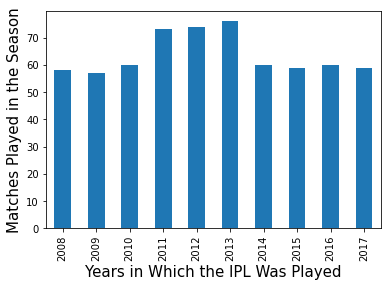

In [4]:
df.groupby('season').size().plot.bar()
plt.xlabel("Years in Which the IPL Was Played", fontsize = 15)
plt.ylabel("Matches Played in the Season", fontsize = 15)


#### 2) Plot a stacked bar chart of matches won of all teams over all the years of IPL.
#### Example, over the years, how many did RCB win, how many did Mumbai Indian win etc.

In [5]:
df.groupby('winner').size()

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
dtype: int64

<AxesSubplot:xlabel='winner'>

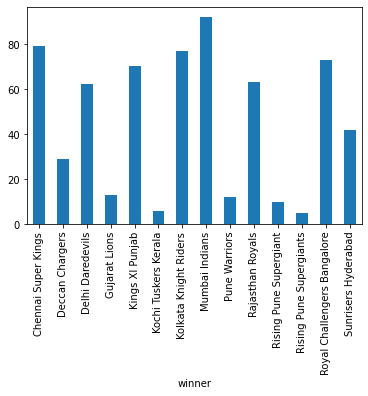

In [6]:
df.groupby('winner').size().plot.bar()

#### Task 2

 matches won of all teams over all the years of IPL. Example, over the years, how many did RCB win, how many did Mumbai Indian win etc.

In [7]:
season_keys=df['season'].unique()
season_keys.sort()
season_keys

winner=df['winner'].unique()


dict_season={}
for i in winner:
    dict_season[i]=[]
    
for team in dict_season:
    for yr in season_keys:
        temp=df[(df['season']==yr)  & (df['winner']==team)]
        dict_season[team].append(temp.shape[0])

In [8]:
pd.DataFrame(dict_season,index=season_keys)

,Sunrisers Hyderabad,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore,Mumbai Indians,Delhi Daredevils,Gujarat Lions,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Pune Warriors,Kochi Tuskers Kerala,NaN,Rising Pune Supergiants
2008,0,0,6,10,4,7,7,0,9,13,2,0,0,0,0
2009,0,0,3,7,9,5,10,0,8,6,9,0,0,0,0
2010,0,0,7,4,8,11,7,0,9,6,8,0,0,0,0
2011,0,0,8,7,10,10,4,0,11,6,6,4,6,0,0
2012,0,0,12,8,8,10,11,0,10,7,4,4,0,0,0
2013,10,0,6,8,9,13,3,0,12,11,0,4,0,0,0
2014,6,0,11,12,5,7,2,0,10,7,0,0,0,0,0
2015,7,0,7,3,8,10,5,0,10,7,0,0,0,0,0
2016,11,0,8,4,9,7,7,9,0,0,0,0,0,0,5
2017,8,10,9,7,3,12,6,4,0,0,0,0,0,0,0


<AxesSubplot:xlabel='winner'>

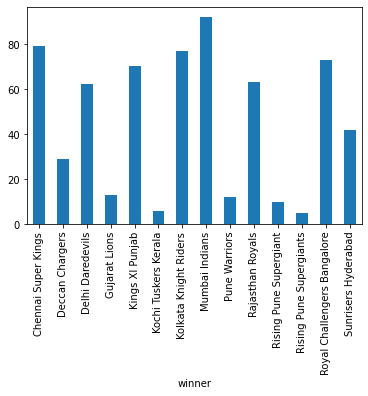

In [9]:
df.groupby('winner').size().plot.bar()

In [10]:
#Reading deliveries.csv
df2=pd.read_csv('deliveries.csv')

# renaming the column "id" to "match_id"
df.rename(columns = {"id": "match_id"}, 
          inplace = True)


#merging two dataframes based on match_id
concanate_df=pd.merge(df, df2, on='match_id')
concanate_df

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [11]:
#Reading deliveries.csv
df2=pd.read_csv('deliveries.csv')

# renaming the column "id" to "match_id"
df.rename(columns = {"id": "match_id"}, 
          inplace = True)


#merging two dataframes based on match_id
concanate_df=pd.merge(df, df2, on='match_id')
concanate_df.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### For a year "YYYY" plot the extra runs conceded per team. Take YYYY as input from user.

In [12]:
yr=int(input("Enter Year :  "))

Enter Year :  2008


In [13]:
concanate_df[concanate_df['season']==yr].groupby('winner' )['extra_runs'].sum()

winner
Chennai Super Kings            178
Deccan Chargers                 35
Delhi Daredevils               107
Kings XI Punjab                187
Kolkata Knight Riders          145
Mumbai Indians                 159
Rajasthan Royals               258
Royal Challengers Bangalore     59
Name: extra_runs, dtype: int64

<AxesSubplot:xlabel='winner'>

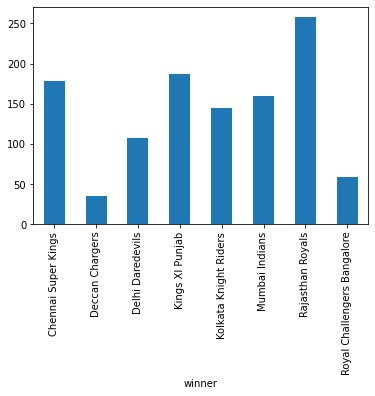

In [14]:
concanate_df[concanate_df['season']==yr].groupby('winner' )['extra_runs'].sum().plot.bar()

In [15]:
####  For a year "YYYY" plot the top economical bowlers. Take YYYY as input from user.

#not understand ques

#### For a year "YYYY" plot a chart for matches played vs matches won for each team. Take YYYY as input from user.

In [16]:
yr=int(input("Enter year : "))

Enter year : 2008


In [17]:
df['team1'].unique()
team1_all = pd.crosstab(index = df[df['season']==yr]['team1'], columns = 'count')
team2_all = pd.crosstab(index = df[df['season']==yr]['team2'], columns = 'count')
final_team = team1_all.add(team2_all)

In [18]:
winner = pd.crosstab(index = df[df['season']==yr]['winner'], columns = "count")

In [19]:
final_team['wins'] = winner['count']
final_team

col_0,count,wins
team1,,
Chennai Super Kings,16,9
Deccan Chargers,14,2
Delhi Daredevils,14,7
Kings XI Punjab,15,10
Kolkata Knight Riders,13,6
Mumbai Indians,14,7
Rajasthan Royals,16,13
Royal Challengers Bangalore,14,4


<AxesSubplot:xlabel='team1'>

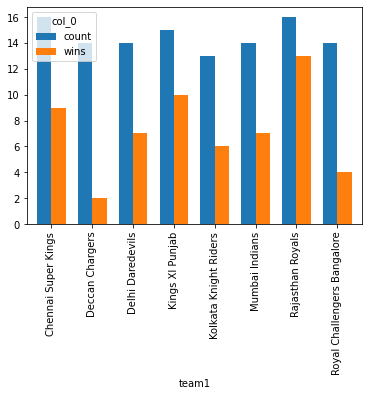

In [20]:
final_team[['count', 'wins']].plot(kind = 'bar' ,  width = 0.7)